<a href="https://colab.research.google.com/github/ElMango29/29021728_Personal_Project_Code/blob/main/29021728_Personal_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
# Installing the necessary external packages and versions
!pip install numpy==1.23.0
!pip install zigzag
!pip install pandas_ta

In [ ]:
# General required packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math

# ZigZag indicator
from zigzag import *

# For evaluation metrics: MSE(Mean Squared Error), MAE(Mean Absolute Error), R2(coefficient of determination)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# For normalization scaler
from sklearn.preprocessing import MinMaxScaler

# Plotting candle graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

# For file upload
from google.colab import files

# Technical indicators
import pandas_ta as pta

# For extra plotting
import seaborn as sns
sns.set()
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

# For Machine Learning/Deep Learning models and earlystopping callback
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

In [ ]:
# Uploading the file
files.upload()

In [ ]:
# Turn the file into a DataFrame and name the columns appropriately (Swap the 'EURUSD15' to 'GBPUSD15' or vice versa depending on dataset chosen)
df = pd.read_csv('EURUSD15.csv', 
                 names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"], 
                 sep=' |\t', 
                 engine='python')

# Convert the Date from series to DateTime object
df['Date'] = pd.to_datetime(df['Date'])

# View the data
df

Date   Time     Open     High      Low    Close  Volume
0      2014-12-22  01:30  1.56369  1.56382  1.56368  1.56377     359
1      2014-12-22  01:45  1.56378  1.56437  1.56374  1.56424     792
2      2014-12-22  02:00  1.56424  1.56431  1.56416  1.56426     532
3      2014-12-22  02:15  1.56427  1.56436  1.56420  1.56433     278
4      2014-12-22  02:30  1.56433  1.56444  1.56429  1.56436     345
...           ...    ...      ...      ...      ...      ...     ...
199995 2022-12-29  08:45  1.20489  1.20628  1.20475  1.20548    2060
199996 2022-12-29  09:00  1.20549  1.20551  1.20447  1.20498    2017
199997 2022-12-29  09:15  1.20498  1.20513  1.20266  1.20347    1728
199998 2022-12-29  09:30  1.20349  1.20358  1.20274  1.20338    1435
199999 2022-12-29  09:45  1.20335  1.20375  1.20300  1.20348    1214

[200000 rows x 7 columns]

# PART 1: Data Exploration and Understanding

### General Understanding

In [ ]:
# Display df information
print(df.info())

# Display the shape
print("\n", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    200000 non-null  datetime64[ns]
 1   Time    200000 non-null  object        
 2   Open    200000 non-null  float64       
 3   High    200000 non-null  float64       
 4   Low     200000 non-null  float64       
 5   Close   200000 non-null  float64       
 6   Volume  200000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 10.7+ MB
None

 (200000, 7)


In [ ]:
# Plot the data as a candle graph - inspired from https://www.youtube.com/watch?v=Mxk8PP3vbuA 

def plot_fig(data):
  fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
  fig.update_layout(xaxis_rangeslider_visible=False,
                title="GBPUSD 15M Candle Chart",
                xaxis_title="Index",
                yaxis_title="Price")
  fig.show()

plot_fig(df)

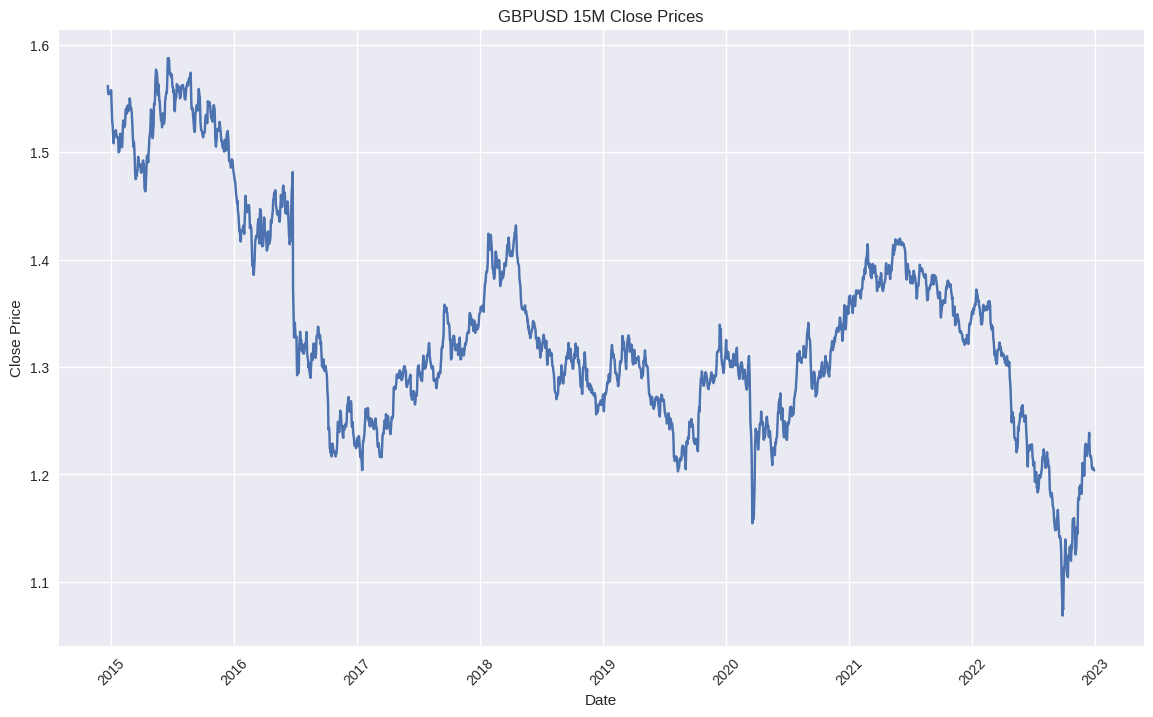

In [ ]:
# Plotting close of currency pair
sns.lineplot(data=df, x=df.Date, y=df.Close)

# Plot Customizations
plt.title('GBPUSD 15M Close Prices')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')

# Display
plt.show()

### Plotting an excerpt of the data using the methodology


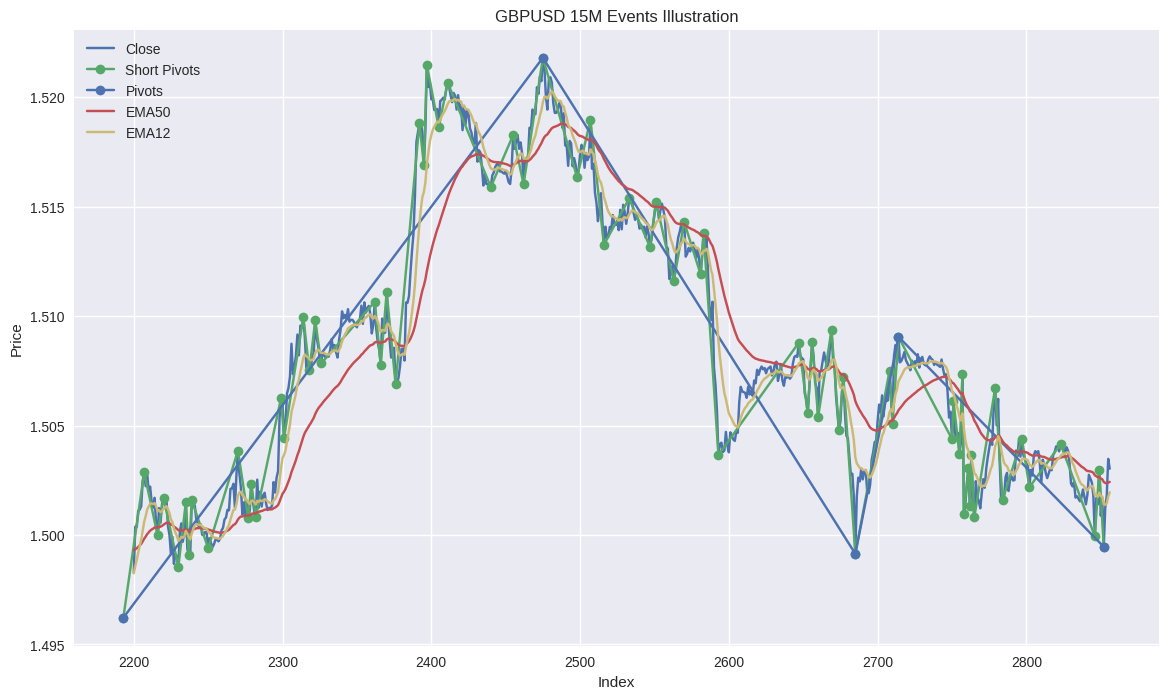

In [ ]:
# Definitions
plotFrom = 2200
plotTo = 2857
plotFromI = 0
plotToI = 0
plotFromIShort = 0
plotToIShort = 0

# Calculating peaks, short peaks, pivots, and short pivots
pivots = peak_valley_pivots(df.Close, 0.005, -0.005)
shortPivots = peak_valley_pivots(df.Close, 0.001, -0.001)
ts_pivots = pd.Series(df.Close, index=df.index)
ts_pivots = ts_pivots[pivots != 0]
ts_shortPivots = pd.Series(df.Close, index=df.index)
ts_shortPivots = ts_shortPivots[shortPivots != 0]

# Calculating EMA cross overs
ema12_tograph = pta.ema(close=df.Close, length=12)
ema50_tograph = pta.ema(close=df.Close, length=50)

# Finding pivot points for graphing
for i in range(0, len(ts_pivots.index)):
  if (ts_pivots.index[i] <= plotFrom):
    plotFromI = i
  elif ts_pivots.index[i] >= plotTo:
    plotToI = i
    break

# Finding short pivot points for graphing
for i in range(0, len(ts_shortPivots.index)):
  if (ts_shortPivots.index[i] <= plotFrom):
    plotFromIShort = i
  elif ts_shortPivots.index[i] >= plotTo:
    plotToIShort = i
    break


# Plotting the data
df.Close[plotFrom:plotTo].plot()
ts_shortPivots[plotFromIShort:plotToIShort].plot(style='g-o', label='Short Pivots')
ts_pivots[plotFromI:plotToI].plot(style='b-o', label='Pivots');
ema50_tograph[plotFrom:plotTo].plot(style='r', label='EMA50')
ema12_tograph[plotFrom:plotTo].plot(style='y', label='EMA12')
plt.legend(loc="upper left")
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('GBPUSD 15M Events Illustration')
plt.show()

# Verifications
# print(pivots)
# print(pivots.shape)
# print(ts_pivots)
# print(ts_pivots.shape)
# print(ts_pivots)
# print(ts_shortPivots.shape)




































































# PART 2: Data Processing and Feature Selection

### Calculating & Adding Tested Technical Indicators

In [ ]:
# Adding indicators via adding columns to the data (df) table
# Formats are either df['name'] = pta.indicator_name(parameters); or name = df.pta.indicator; and concatenate to df at the end.

# Moving Average Convergence/Divergence (MACD)
# (includes lines based on fast/slow EMA's, histogram, and signal)
macd = pta.macd(df.Close, fast=12, slow=24)

# Simple Moving Average (SMA)
sma5 = pta.sma(close=df.Close, length=5)
sma10 = pta.sma(close=df.Close, length=10)
sma15 = pta.sma(close=df.Close, length=15)
sma20 = pta.sma(close=df.Close, length=20)
sma25 = pta.sma(close=df.Close, length=25)
sma30 = pta.sma(close=df.Close, length=30)
sma36 = pta.sma(close=df.Close, length=36)

# Relative Strength Index (RSI)
rsi5 = pta.rsi(close=df.Close, length=5)
rsi14 = pta.rsi(close=df.Close, length=14)
rsi20 = pta.rsi(close=df.Close, length=20)
rsi25 = pta.rsi(close=df.Close, length=25)

# Average Directional Index (ADX)
adx5 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=5)
adx10 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=10)
adx15 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=15)
adx20 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=20)
adx25 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=25)
adx30 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=30)
adx35 = pta.adx(high=df.High, low=df.Low, close=df.Close, length=35)

# Boillinger Bands
bb = pta.bbands(close=df.Close, length=14)

# Williams Percent Range (WR)
wr5 = pta.willr(high=df.High, low=df.Low, close=df.Close, length=5)
wr14 = pta.willr(high=df.High, low=df.Low, close=df.Close, length=14)
wr20 = pta.willr(high=df.High, low=df.Low, close=df.Close, length=20)
wr25 = pta.willr(high=df.High, low=df.Low, close=df.Close, length=25)

df = pd.concat([df,
                macd,
                sma5, sma10, sma15, sma20, sma25, sma30, sma36,
                rsi5, rsi14, rsi20, rsi25, 
                adx5, adx10, adx15, adx20, adx25, adx30, adx35,
                bb,
                wr5, wr14, wr20, wr25,
                ], axis=1)

# Drop empty values/rows. Drops values due to technical indicators being NaN due to indicator settings.
df.dropna(inplace=True)
# Reset the index
df.reset_index(inplace=True)

# Drop the volume, date, time, and old index as they aren't needed.
df.drop(['Volume', 'Date', 'Time', 'index'], axis=1, inplace=True)

# View the changed DF
print(df.shape)
df

(199931, 48)


Open     High      Low    Close  MACD_12_24_9  MACDh_12_24_9  \
0       1.56033  1.56062  1.55878  1.55888     -0.000485      -0.000139   
1       1.55890  1.56004  1.55869  1.55880     -0.000582      -0.000189   
2       1.55880  1.55886  1.55730  1.55733     -0.000759      -0.000292   
3       1.55733  1.55813  1.55731  1.55801     -0.000837      -0.000296   
4       1.55801  1.55852  1.55742  1.55796     -0.000891      -0.000280   
...         ...      ...      ...      ...           ...            ...   
199926  1.20489  1.20628  1.20475  1.20548      0.000335       0.000218   
199927  1.20549  1.20551  1.20447  1.20498      0.000371       0.000203   
199928  1.20498  1.20513  1.20266  1.20347      0.000283       0.000092   
199929  1.20349  1.20358  1.20274  1.20338      0.000204       0.000011   
199930  1.20335  1.20375  1.20300  1.20348      0.000148      -0.000037   

        MACDs_12_24_9     SMA_5    SMA_10    SMA_15  ...     DMN_35  \
0           -0.000346  1.560368  1.560523  1.560955  ...  30.088627   
1           -0.000393  1.559922  1.560323  1.560744  ...  28.973993   
2           -0.000466  1.559210  1.560015  1.560445  ...  32.195473   
3           -0.000540  1.558670  1.559738  1.560205  ...  31.288412   
4           -0.000610  1.558196  1.559465  1.559963  ...  30.116710   
...               ...       ...       ...       ...  ...        ...   
199926       0.000117  1.204560  1.204054  1.203564  ...  16.513451   
199927       0.000168  1.204810  1.204317  1.203678  ...  16.852023   
199928       0.000191  1.204670  1.204324  1.203741  ...  21.008529   
199929       0.000194  1.204436  1.204268  1.203789  ...  20.480389   
199930       0.000185  1.204158  1.204205  1.203853  ...  20.017858   

        BBL_14_2.0  BBM_14_2.0  BBU_14_2.0  BBB_14_2.0  BBP_14_2.0    WILLR_5  \
0         1.559363    1.560883    1.562403    0.194799   -0.158709 -95.901639   
1         1.558903    1.560667    1.562432    0.226131   -0.029062 -95.652174   
2         1.557980    1.560362    1.562744    0.305339   -0.136417 -99.173554   
3         1.557545    1.560106    1.562666    0.328213    0.090718 -79.300292   
4         1.557285    1.559809    1.562333    0.323640    0.133672 -80.120482   
...            ...         ...         ...         ...         ...        ...   
199926    1.201554    1.203585    1.205616    0.337438    0.966594 -29.629630   
199927    1.201704    1.203761    1.205818    0.341796    0.796346 -51.181102   
199928    1.201845    1.203819    1.205793    0.327956    0.411709 -77.624309   
199929    1.202019    1.203879    1.205740    0.309130    0.365839 -80.110497   
199930    1.202445    1.203989    1.205534    0.256544    0.335117 -77.348066   

         WILLR_14   WILLR_20   WILLR_25  
0      -97.118156 -97.647059 -97.647059  
1      -96.793003 -97.465438 -97.465438  
2      -99.377593 -99.476440 -99.476440  
3      -85.269710 -87.609075 -87.609075  
4      -86.278586 -88.108108 -88.481675  
...           ...        ...        ...  
199926 -16.427105 -16.427105 -16.427105  
199927 -26.694045 -26.694045 -26.694045  
199928 -57.700205 -57.700205 -57.700205  
199929 -59.548255 -59.548255 -59.548255  
199930 -57.494867 -57.494867 -57.494867  

[199931 rows x 48 columns]

In [ ]:
# PRINTING COLUMNS FOR IDENTIFICATION OF INDICATORS
print(df.columns)

# Dropping unnecessary columns.
df.drop(['BBB_14_2.0','BBP_14_2.0', 'DMN_35', 'DMP_35', 'DMN_30', 'DMP_30', 'DMN_25', 'DMP_25', 'DMN_20', 'DMP_20', 'DMN_15', 'DMP_15', 'DMN_10', 'DMP_10', 'DMN_5', 'DMP_5'], axis=1, inplace=True)

print(df.columns)
print(len(df.columns))

Index(['Open', 'High', 'Low', 'Close', 'MACD_12_24_9', 'MACDh_12_24_9',
       'MACDs_12_24_9', 'SMA_5', 'SMA_10', 'SMA_15', 'SMA_20', 'SMA_25',
       'SMA_30', 'SMA_36', 'RSI_5', 'RSI_14', 'RSI_20', 'RSI_25', 'ADX_5',
       'DMP_5', 'DMN_5', 'ADX_10', 'DMP_10', 'DMN_10', 'ADX_15', 'DMP_15',
       'DMN_15', 'ADX_20', 'DMP_20', 'DMN_20', 'ADX_25', 'DMP_25', 'DMN_25',
       'ADX_30', 'DMP_30', 'DMN_30', 'ADX_35', 'DMP_35', 'DMN_35',
       'BBL_14_2.0', 'BBM_14_2.0', 'BBU_14_2.0', 'BBB_14_2.0', 'BBP_14_2.0',
       'WILLR_5', 'WILLR_14', 'WILLR_20', 'WILLR_25'],
      dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'MACD_12_24_9', 'MACDh_12_24_9',
       'MACDs_12_24_9', 'SMA_5', 'SMA_10', 'SMA_15', 'SMA_20', 'SMA_25',
       'SMA_30', 'SMA_36', 'RSI_5', 'RSI_14', 'RSI_20', 'RSI_25', 'ADX_5',
       'ADX_10', 'ADX_15', 'ADX_20', 'ADX_25', 'ADX_30', 'ADX_35',
       'BBL_14_2.0', 'BBM_14_2.0', 'BBU_14_2.0', 'WILLR_5', 'WILLR_14',
       'WILLR_20', 'WILLR_25'],
      dtype='obj

### Identifying E1, E2, E3, and E4 for full data

In [ ]:
# E1, Pivot points via ZigZag indicator; puts into pivots np array (pivots) and time series pivots np array (ts_pivots)
pivots = peak_valley_pivots(df.Close, 0.005, -0.005)
ts_pivots = pd.Series(df.Close, index=df.index)
ts_pivots = ts_pivots[pivots != 0]

# Same as pivots for short pivots
shortPivots = peak_valley_pivots(df.Close, 0.001, -0.001)
ts_shortPivots = pd.Series(df.Close, index=df.index)
ts_shortPivots = ts_shortPivots[shortPivots != 0]

# E2, Confirmation via 12 and 50 EMA crossover event
ema12 = pta.ema(close=df.Close, length=12)
ema50 = pta.ema(close=df.Close, length=50)

# Defining crossover event array
emaCrossovers = []

# E3 and E4, Close of candle after confirmation event and next large pivot
toPredict = []
toPredictShort = []
for i in range(0, len(ts_pivots.index)-1):
  point = ts_pivots.index[i]+1;  # sets the index point to a var for simplification, adds 1 to make sure it starts at the price after the pivot.
  
  if (math.isnan(ema12[point]) or math.isnan(ema50[point]) or (point+100>=df.size)): # Makes sure it takes no NANs or goes outside array range in next FOR loop
        continue
  
  # From each pivot point to the next pivot point, checks to see if there is a crossover event (E2).
  for j in range(point, ts_pivots.index[i+1]-1):
    # Verifies where the crossover happens
    if ((ema12.iloc[j-1] > ema50.iloc[j-1] and ema12.iloc[j+1] < ema50.iloc[j+1]) or (ema12.iloc[j-1] < ema50.iloc[j-1] and ema12.iloc[j+1] > ema50.iloc[j+1])):

      # Checks and appends where the next retracement happens
      for k in range(0, len(ts_shortPivots.index)-1):
        if(ts_shortPivots.index[k] >= ts_pivots.index[i+1]):
          break
        if (ts_shortPivots.index[k] >= j):
          toPredictShort.append(ts_shortPivots.values[k])
          
          # Appends the point of crossover
          emaCrossovers.append(j)

          # Appends to toPredict the next pivot point.
          toPredict.append(ts_pivots.values[i+1])
          break
      break
    
print("\nemaCrossovers")
print(emaCrossovers)
print(len(emaCrossovers))
print("\ntoPredict")
print(toPredict)
print(len(toPredict))
print("\ntoPredictShort")
print(toPredictShort)
print(len(toPredictShort))


emaCrossovers
[139, 388, 473, 624, 1078, 1265, 1356, 1556, 1872, 1965, 2038, 2135, 2423, 2636, 2679, 2787, 2952, 3087, 3235, 3383, 3450, 3648, 3821, 3946, 4144, 4412, 5080, 5150, 5397, 5557, 5662, 5796, 5864, 5932, 6067, 6119, 6218, 6355, 6438, 6495, 6637, 6715, 6746, 6818, 6842, 7046, 7189, 7238, 7503, 7568, 7599, 7662, 7695, 7898, 8078, 8228, 8280, 8443, 8471, 8721, 9013, 9204, 9249, 9324, 9336, 9606, 9615, 9720, 9813, 10081, 10268, 10928, 11062, 11160, 11318, 11416, 11448, 11583, 11634, 11779, 11829, 11912, 12127, 12571, 12662, 12755, 12823, 13076, 13169, 13316, 13508, 13825, 13922, 14050, 14117, 14336, 14496, 14615, 14911, 15167, 15453, 15599, 16128, 16220, 16329, 16436, 16517, 16604, 16722, 17030, 17088, 17559, 17948, 18236, 18455, 18839, 19292, 19492, 19561, 19804, 20125, 20268, 20283, 20556, 21234, 21431, 21866, 22162, 22462, 22711, 23006, 23124, 23345, 23432, 23625, 23701, 23951, 24248, 24520, 24938, 25099, 25591, 25896, 25948, 26046, 26079, 26236, 26291, 26641, 26728, 26762, 

In [ ]:
# Drop columns not mentioned within research paper
df.drop(['Open', 'High', 'Low', 'Close'], axis=1, inplace=True)

### Data Processing, Normalization + Assigning Data for Train, Validation, Test

In [ ]:
# Loop through each E2, go back n timesteps, generate 2D array for n timesteps * features,
# stack 2D array at all E2 as training data, price at E3 is target to predict.

# Number of time steps and indicators used
steps = 60
num_indicators = df.shape[1]

# Split on 80-10-10 for train, validation, test arrays and convert to numpy arrays.
# (Once the tuning has happened, train and val are combined for final training)
train_len = math.ceil((len(emaCrossovers)-1) * .8)
val_len = math.ceil((len(emaCrossovers)-1) * .9)

# Normalize the train, val, and test data sets.
# The scaling value, inclusive of the values (they can be 0 or 1).
scaler = MinMaxScaler(feature_range=(0,1))

train_set_norm = df.iloc[0:emaCrossovers[train_len], :].values
val_set_norm = df.iloc[0: emaCrossovers[val_len], :].values
test_set_norm = df.iloc[:, :].values

# Fit_transform only the train data and transform the rest to avoid bias for the testing (data leakage)
train_set_norm = scaler.fit_transform(train_set_norm)
val_set_norm = scaler.transform(val_set_norm)
test_set_norm = scaler.transform(test_set_norm)


# Sets up train, validation, and test arrays.
X_train, X_val, X_test = [], [], []
y_train, y_val, y_test = [], [], []
y_train_short, y_val_short, y_test_short = [], [], []

# Iterates and assigns to each array the correct number of values from the original df
# array. Sets it up based on the number of time steps the RNN will use to predict.
for i in range(0, train_len):
  if (emaCrossovers[i]-steps <= 0):
    continue
  X_train.append(train_set_norm[emaCrossovers[i]-steps:emaCrossovers[i], :])
  y_train.append(toPredict[i])
  y_train_short.append(toPredictShort[i])
X_train, y_train, y_train_short = np.array(X_train), np.array(y_train), np.array(y_train_short)

for i in range(train_len, val_len):
  if (emaCrossovers[i]-steps <= 0):
    continue
  X_val.append(val_set_norm[emaCrossovers[i]-steps:emaCrossovers[i], :])
  y_val.append(toPredict[i])
  y_val_short.append(toPredictShort[i])
X_val, y_val, y_val_short = np.array(X_val), np.array(y_val), np.array(y_val_short)

for i in range(val_len, len(emaCrossovers)-1):
  if (emaCrossovers[i]-steps <= 0):
    continue
  X_test.append(test_set_norm[emaCrossovers[i]-steps:emaCrossovers[i], :])
  y_test.append(toPredict[i])
  y_test_short.append(toPredictShort[i])
X_test, y_test, y_test_short = np.array(X_test), np.array(y_test), np.array(y_test_short)

# # Reshaping the data for RNN
# X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], num_indicators))
# X_val = np.reshape(X_val, newshape=(X_val.shape[0], X_val.shape[1], num_indicators))
# X_test = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], num_indicators))

y_train = np.reshape(y_train, newshape=(y_train.shape[0], 1))
y_val = np.reshape(y_val, newshape=(y_val.shape[0], 1))
y_test = np.reshape(y_test, newshape=(y_test.shape[0], 1))

y_train_short = np.reshape(y_train_short, newshape=(y_train_short.shape[0], 1))
y_val_short = np.reshape(y_val_short, newshape=(y_val_short.shape[0], 1))
y_test_short = np.reshape(y_test_short, newshape=(y_test_short.shape[0], 1))

# Normalizing the target data (wasn't normalized with the features). Same idea of only fit_transform
# the train data, then transforming the val and test datasets.
scaler_target = MinMaxScaler(feature_range=(0,1))
y_train = scaler_target.fit_transform(y_train)
y_val = scaler_target.transform(y_val)
y_test = scaler_target.transform(y_test)

scaler_target_short = MinMaxScaler(feature_range=(0,1))
y_train_short = scaler_target_short.fit_transform(y_train_short)
y_val_short = scaler_target_short.transform(y_val_short)
y_test_short = scaler_target_short.transform(y_test_short)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)
print(y_train_short.shape, y_val_short.shape, y_test_short.shape)

(1030, 60, 28) (129, 60, 28) (128, 60, 28)
(1030, 1) (129, 1) (128, 1)
(1030, 1) (129, 1) (128, 1)


# PART 3: Deep Learning Models

### Setting up the models

In [ ]:
# Baseline RNN Model
def build_model_baseline(steps, units):
  model = models.Sequential()
  model.add(layers.SimpleRNN(units, activation='relu', return_sequences=True, input_shape=(steps, X_train.shape[-1])))
  model.add(layers.SimpleRNN(units, activation='relu', return_sequences=False))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# GRU Model
def build_model_gru(steps, units):
  model = models.Sequential()
  model.add(layers.GRU(units, activation='relu', return_sequences=True, input_shape=(steps, X_train.shape[-1])))
  model.add(layers.GRU(units, activation='relu', return_sequences=False))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# LSTM Model
def build_model_lstm(steps, units):
  model = models.Sequential()
  model.add(layers.LSTM(units, activation='relu', return_sequences=True, input_shape=(steps, X_train.shape[-1])))
  model.add(layers.LSTM(units, activation='relu', return_sequences=False))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# BiLSTM Model
def build_model_bilstm(steps, units):
  model = models.Sequential()
  model.add(layers.Bidirectional(layers.LSTM(units, activation='relu', return_sequences=True, input_shape=(steps, X_train.shape[-1]))))
  model.add(layers.Bidirectional(layers.LSTM(units, activation='relu', return_sequences=False)))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

# PART 4: GBPUSD

## PART 4.1: Building and Training the models (GBPUSD)

### Hyperparameters

In [ ]:
# Tuning can be done for epochs, batch_size, hidden units, etc. Hidden units were chosen based on Matloob K. et al's results.
batch_size = 64
epochs = 100
units = 96

### Creating the models

In [ ]:
# Creating the models
model = build_model_bilstm(steps, units)
model_short = build_model_bilstm(steps, units)

# Define the EarlyStopping callback with validation loss monitoring
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Training (fitting) the models
history = model.fit(x=X_train, y=y_train, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping],
                    epochs=epochs, batch_size=batch_size, verbose=1)

history_short = model_short.fit(x=X_train, y=y_train_short, 
                    validation_data=(X_val, y_val_short),
                    callbacks=[early_stopping],
                    epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
17/17 [==============================] - 13s 386ms/step - loss: 0.0334 - mae: 0.1257 - val_loss: 0.0052 - val_mae: 0.0657
Epoch 2/100
17/17 [==============================] - 4s 237ms/step - loss: 0.0030 - mae: 0.0426 - val_loss: 0.0014 - val_mae: 0.0312
Epoch 3/100
17/17 [==============================] - 4s 225ms/step - loss: 0.0014 - mae: 0.0288 - val_loss: 5.8071e-04 - val_mae: 0.0182
Epoch 4/100
17/17 [==============================] - 6s 341ms/step - loss: 9.7356e-04 - mae: 0.0233 - val_loss: 5.4251e-04 - val_mae: 0.0181
Epoch 5/100
17/17 [==============================] - 4s 235ms/step - loss: 8.9913e-04 - mae: 0.0224 - val_loss: 4.9939e-04 - val_mae: 0.0166
Epoch 6/100
17/17 [==============================] - 4s 238ms/step - loss: 7.9062e-04 - mae: 0.0206 - val_loss: 6.0808e-04 - val_mae: 0.0186
Epoch 7/100
17/17 [==============================] - 6s 343ms/step - loss: 7.4612e-04 - mae: 0.0200 - val_loss: 6.4585e-04 - val_mae: 0.0196
Epoch 8/100
17/17 [=============

### Evaluating best epochs

In [ ]:
# Best epochs
print('Short Pivot Best Epochs: ',np.argmin(history_short.history['val_loss']) + 1)
print('Large Pivot Best Epochs: ',np.argmin(history.history['val_loss']) + 1)

Short Pivot Best Epochs:  39
Large Pivot Best Epochs:  36


## PART 4.2: Model Evaluations and Testing (GBPUSD)

### Viewing the training

In [ ]:
# Getting the MAE history for both
mae_history = history.history['mae']
val_mae_history = history.history['val_mae']
mae_history_short = history_short.history['mae']
val_mae_history_short = history_short.history['val_mae']

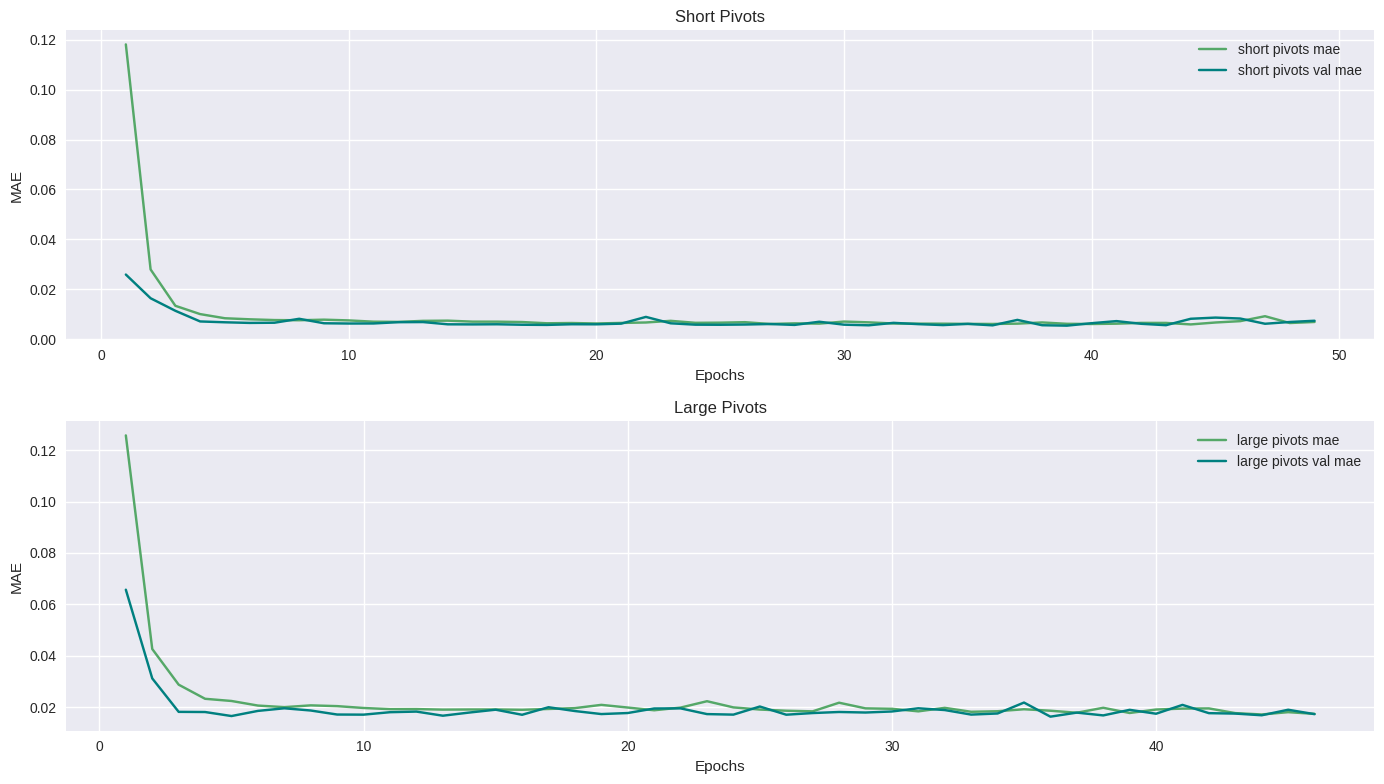

In [ ]:
# Plotting the average mae, accuracy of the training and validation for both
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(range(1, len(mae_history_short) + 1), mae_history_short, label='short pivots mae', color='g')
ax1.plot(range(1, len(val_mae_history_short)+1), val_mae_history_short, label='short pivots val mae', color='teal')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.set_title('Short Pivots')
ax1.legend()

ax2.plot(range(1, len(mae_history) + 1), mae_history, label='large pivots mae', color='g')
ax2.plot(range(1, len(val_mae_history)+1), val_mae_history, label='large pivots val mae', color='teal')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAE')
ax2.set_title('Large Pivots')
ax2.legend()



fig.tight_layout()
plt.show()

### Evaluating The Models Through Prediction, Comparison, and Plotting

In [ ]:
# Making prediction using unseen Test data
prediction_test = model.predict(X_test)
prediction_test_short = model_short.predict(X_test)

4/4 [==============================] - 1s 40ms/step


In [ ]:
# De-normalize the train and test data and predictions

prediction_test_unscaled = scaler_target.inverse_transform(prediction_test)
prediction_test_short_unscaled = scaler_target_short.inverse_transform(prediction_test_short)
y_test_unscaled = scaler_target.inverse_transform(y_test)
y_test_short_unscaled = scaler_target_short.inverse_transform(y_test_short)

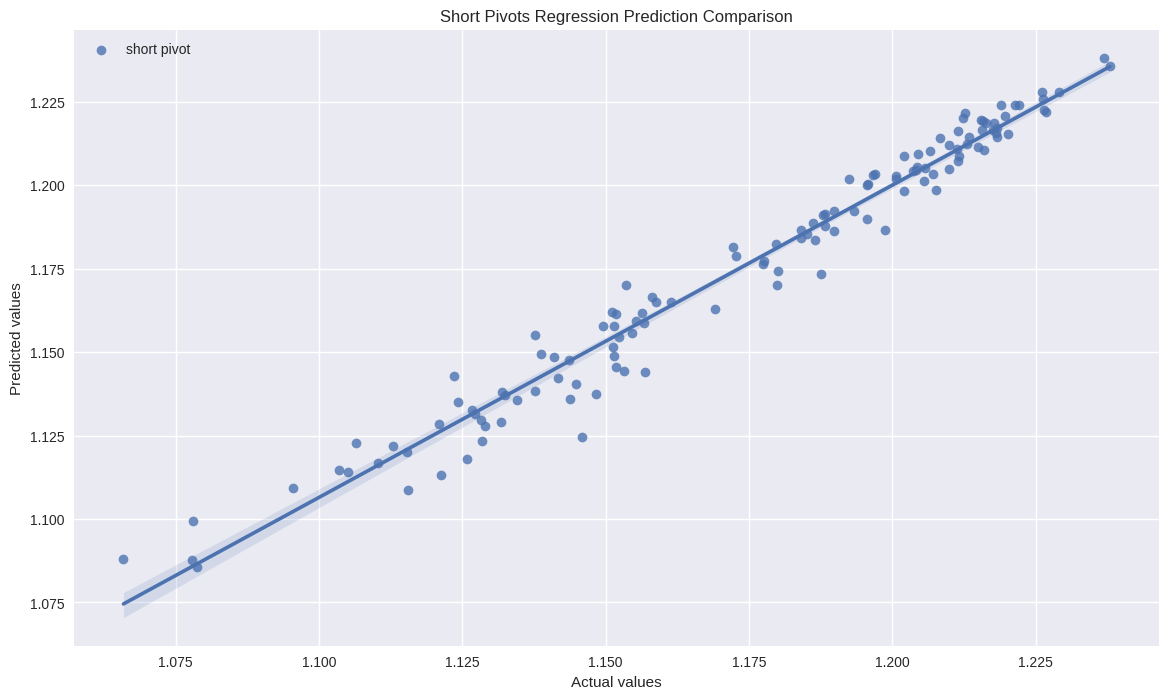

In [ ]:
# Plot of predicted vs Actual values for short Pivots using test model
sns.regplot(x=y_test_short_unscaled, y=prediction_test_short_unscaled, label='short pivot')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Short Pivots Regression Prediction Comparison')
plt.legend()
plt.show()

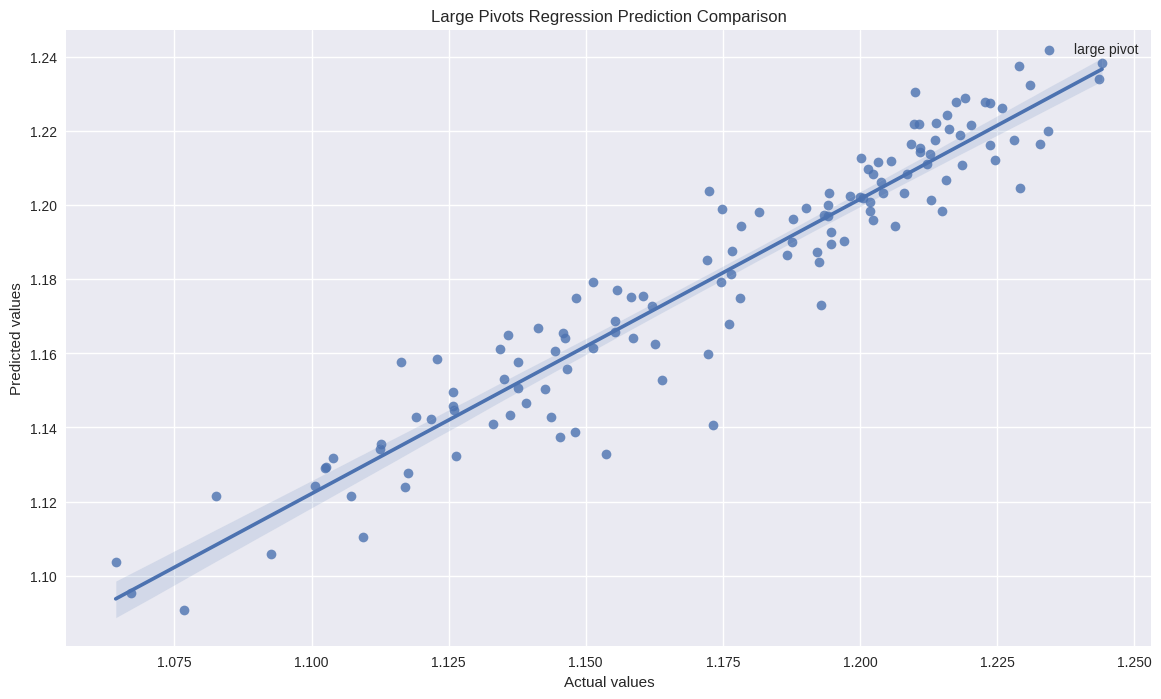

In [ ]:
# Plot of predicted vs Actual values for large Pivots using test model
sns.regplot(x=y_test_unscaled, y=prediction_test_unscaled, label='large pivot')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Large Pivots Regression Prediction Comparison')
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics
print('TEST PREDICTION:')
print(f'Short Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
print('R2-score:', r2_score(y_test_short_unscaled, prediction_test_short_unscaled)*100) # R2 score (coefficient of determination)
print('MSE:', mean_squared_error(y_test_short_unscaled, prediction_test_short_unscaled)) # MSE (Mean Squared Error)
print('RMSE:', mean_squared_error(y_test_short_unscaled, prediction_test_short_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE:', mean_absolute_percentage_error(y_test_short_unscaled, prediction_test_short_unscaled)*100) # MAPE (Mean Absolute Percentage Error)
print()
print(f'Large Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
print('R2-score:', r2_score(y_test_unscaled, prediction_test_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE:', mean_squared_error(y_test_unscaled, prediction_test_unscaled)) # MSE (Mean Squared Error)
print('RMSE:', mean_squared_error(y_test_unscaled, prediction_test_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE:', mean_absolute_percentage_error(y_test_unscaled, prediction_test_unscaled)*100) # MAPE (Mean Absolute Percentage Error)

TEST PREDICTION:
Short Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 96.82390295134925
MSE: 5.1684779174614005e-05
RMSE: 0.007189212695046239
MAPE: 0.4723723242183478

Large Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 86.69259662911432
MSE: 0.00023707841574661595
RMSE: 0.015397350932761646
MAPE: 1.0578553952042717


In [ ]:
# Comparison Array
comparison = y_test_unscaled
comparison = np.append(comparison, prediction_test_unscaled, axis=1)

comparisonShort = y_test_short_unscaled
comparisonShort = np.append(comparisonShort, prediction_test_short_unscaled, axis=1)
print(comparison.shape)
print(comparison[0],comparison[1])
print(comparisonShort[0],comparisonShort[1])

(128, 2)
[1.22893    1.23766029] [1.23275    1.21660352]
[1.22617    1.22783148] [1.22681    1.22199976]


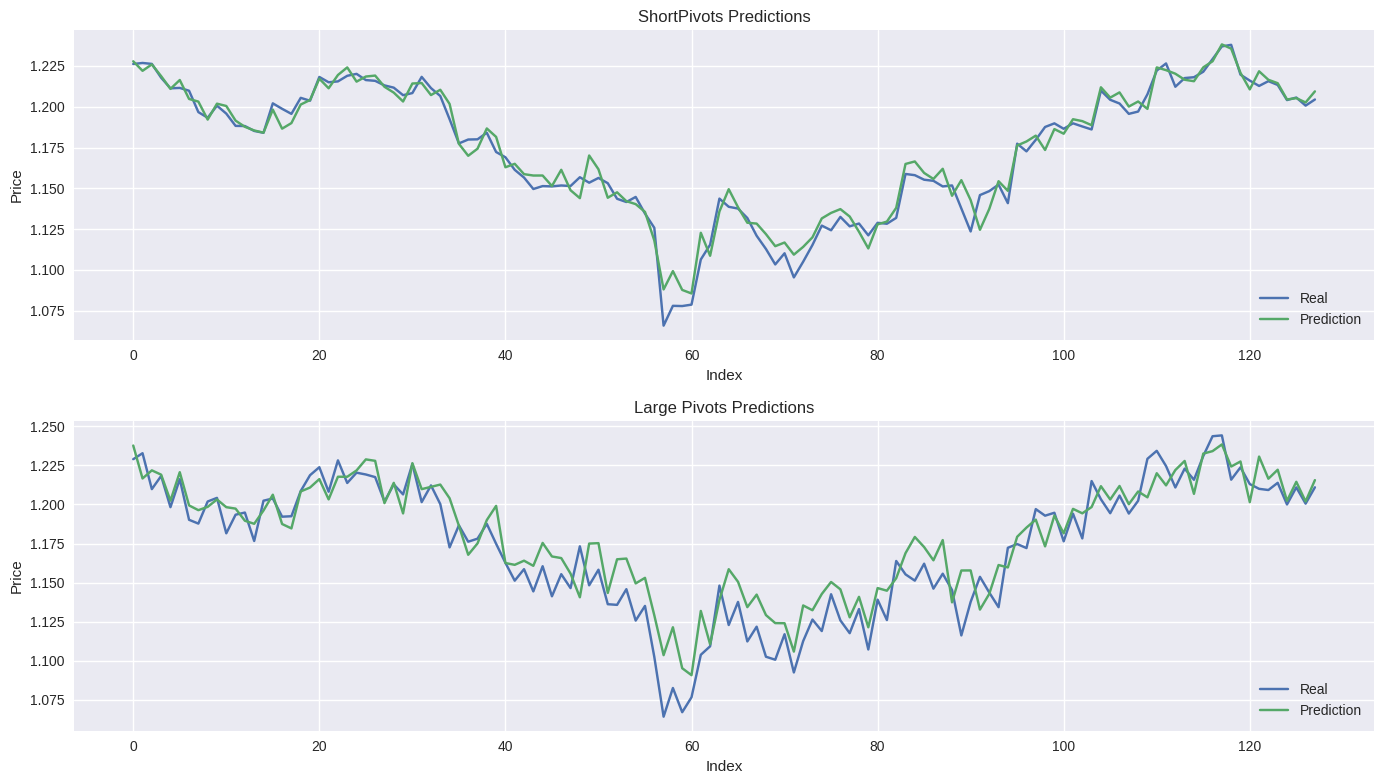

In [ ]:
# Plotting
# Short pivots prediction (E3)
plt.subplot(2, 1, 1) 
plt.title("ShortPivots Predictions") 
plt.xlabel("Index") 
plt.ylabel("Price") 
plt.plot(y_test_short_unscaled)
plt.plot(prediction_test_short_unscaled)
plt.legend(['Real', 'Prediction'], loc='lower right')

# Big pivots prediction (E4)
plt.subplot(2, 1, 2)
plt.title("Large Pivots Predictions") 
plt.xlabel("Index") 
plt.ylabel("Price")  
plt.plot(y_test_unscaled)
plt.plot(prediction_test_unscaled)
plt.legend(['Real', 'Prediction'], loc='lower right')

plt.tight_layout()
plt.show()

## PART 4.3: Finding Best Model and Steps for Long Pivots (GBPUSD)

### Hyperparameters

In [ ]:
# Hyperparameters to test (steps hyperparameter to be adjusted at the data processing level)
batch_size = 64
epochs = 100
units = 96

### Declaring the models

In [ ]:
# Simple RNN Baseline
gbpusd_baseline = build_model_baseline(steps, units)

# GRU
gbpusd_gru = build_model_gru(steps, units)

# LSTM
gbpusd_lstm = build_model_lstm(steps, units)

# BiLSTM
gbpusd_bilstm = build_model_bilstm(steps, units)

### Fitting the models

In [ ]:
# Define the EarlyStopping callback with validation loss monitoring
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Training (fitting) the models
# Simple RNN Baseline
history_gbpusd_baseline = gbpusd_baseline.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

# GRU
history_gbpusd_gru = gbpusd_gru.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

# LSTM
history_gbpusd_lstm = gbpusd_lstm.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

# BiLSTM
history_gbpusd_bilstm = gbpusd_bilstm.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/100
17/17 [==============================] - 3s 58ms/step - loss: 0.0259 - mae: 0.1231 - val_loss: 0.0063 - val_mae: 0.0644
Epoch 2/100
17/17 [==============================] - 1s 56ms/step - loss: 0.0035 - mae: 0.0466 - val_loss: 0.0030 - val_mae: 0.0472
Epoch 3/100
17/17 [==============================] - 1s 57ms/step - loss: 0.0020 - mae: 0.0355 - val_loss: 0.0010 - val_mae: 0.0244
Epoch 4/100
17/17 [==============================] - 1s 59ms/step - loss: 0.0013 - mae: 0.0278 - val_loss: 9.8585e-04 - val_mae: 0.0241
Epoch 5/100
17/17 [==============================] - 1s 54ms/step - loss: 0.0011 - mae: 0.0254 - val_loss: 8.5399e-04 - val_mae: 0.0230
Epoch 6/100
17/17 [==============================] - 1s 37ms/step - loss: 0.0010 - mae: 0.0248 - val_loss: 7.8471e-04 - val_mae: 0.0222
Epoch 7/100
17/17 [==============================] - 1s 35ms/step - loss: 9.1490e-04 - mae: 0.0234 - val_loss: 7.4539e-04 - val_mae: 0.0217
Epoch 8/100
17/17 [==============================] - 1s 

### Finding best epochs (for use in final model)

In [ ]:
# Best epochs
print('Baseline RNN:')
print('Large Pivot Best Epochs: ',np.argmin(history_gbpusd_baseline.history['val_loss']) + 1)
print()
print('GRU:')
print('Large Pivot Best Epochs: ',np.argmin(history_gbpusd_gru.history['val_loss']) + 1)
print()
print('LSTM:')
print('Large Pivot Best Epochs: ',np.argmin(history_gbpusd_lstm.history['val_loss']) + 1)
print()
print('BILSTM:')
print('Large Pivot Best Epochs: ',np.argmin(history_gbpusd_bilstm.history['val_loss']) + 1)

Baseline RNN:
Large Pivot Best Epochs:  33

GRU:
Large Pivot Best Epochs:  25

LSTM:
Large Pivot Best Epochs:  19

BILSTM:
Large Pivot Best Epochs:  31


### Models Prediction Results and Evaluation

In [ ]:
# Making prediction using unseen Test data
# Baseline RNN
baseline_prediction = gbpusd_baseline.predict(X_test)

# GRU
gru_prediction = gbpusd_gru.predict(X_test)

# LSTM
lstm_prediction = gbpusd_lstm.predict(X_test)

# BILSTM
bilstm_prediction = gbpusd_bilstm.predict(X_test)

4/4 [==============================] - 1s 47ms/step


In [ ]:
# De-normalize the train and test data and predictions

# Baseline RNN
baseline_prediction_unscaled = scaler_target.inverse_transform(baseline_prediction)

# GRU
gru_prediction_unscaled = scaler_target.inverse_transform(gru_prediction)

# LSTM
lstm_prediction_unscaled = scaler_target.inverse_transform(lstm_prediction)

# BILSTM
bilstm_prediction_unscaled = scaler_target.inverse_transform(bilstm_prediction)

# Common target data unscaled
y_test_unscaled = scaler_target.inverse_transform(y_test)

In [ ]:
# Evaluation metrics
print(f'TEST PREDICTION: Large Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
print()
print('Baseline RNN')
print('R2-score:', r2_score(y_test_unscaled, baseline_prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE:', mean_squared_error(y_test_unscaled, baseline_prediction_unscaled)) # MSE (Mean Squared Error)
print('RMSE:', mean_squared_error(y_test_unscaled, baseline_prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE:', mean_absolute_percentage_error(y_test_unscaled, baseline_prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)
print()
print('GRU')
print('R2-score:', r2_score(y_test_unscaled, gru_prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE:', mean_squared_error(y_test_unscaled, gru_prediction_unscaled)) # MSE (Mean Squared Error)
print('RMSE:', mean_squared_error(y_test_unscaled, gru_prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE:', mean_absolute_percentage_error(y_test_unscaled, gru_prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)
print()
print('LSTM')
print('R2-score:', r2_score(y_test_unscaled, lstm_prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE:', mean_squared_error(y_test_unscaled, lstm_prediction_unscaled)) # MSE (Mean Squared Error)
print('RMSE:', mean_squared_error(y_test_unscaled, lstm_prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE:', mean_absolute_percentage_error(y_test_unscaled, lstm_prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)
print()
print('BiLSTM')
print('R2-score:', r2_score(y_test_unscaled, bilstm_prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE:', mean_squared_error(y_test_unscaled, bilstm_prediction_unscaled)) # MSE (Mean Squared Error)
print('RMSE:', mean_squared_error(y_test_unscaled, bilstm_prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE:', mean_absolute_percentage_error(y_test_unscaled, bilstm_prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)

TEST PREDICTION: Large Pivots: Steps 40, Batch size 64, Hidden Units 96

Baseline RNN
R2-score: 75.66161660879595
MSE: 0.00043360114782756224
RMSE: 0.020823091697141475
MAPE: 1.3371047051980227

GRU
R2-score: 91.50380126661248
MSE: 0.000151364265397319
RMSE: 0.012303018548198609
MAPE: 0.8245754216241176

LSTM
R2-score: 92.24284415422706
MSE: 0.00013819782622949468
RMSE: 0.01175575715253997
MAPE: 0.7785463849510239

BiLSTM
R2-score: 91.04383854433868
MSE: 0.0001595587440991331
RMSE: 0.012631656427370604
MAPE: 0.8615944656869517


## PART 4.4: Final Models (long and short pivots) with Combined Train + Val Datasets for Training and Results (GBPUSD)

### Short Pivot Model (GBPUSD)

#### Building, Training, and Predicting using Final Model

In [ ]:
# After finishing tuning, final training on whole train + val data. 
# Final tuning adjustments. (time_steps were declared at the data split part in the 'Part 2: data processing and feature selection')
# Epochs was used based on results from the training section's callbacks epoch stop
batch_size_final = 64
epochs_short_final = 29
units = 96

# Steps were based on previous test results
steps = 40

In [ ]:
# Build the short pivots model 
model_short_final = build_model_bilstm(steps, units)

# Combine val and train arrays to make the full training input and target
X_total_train = np.concatenate((X_train,X_val), axis=0)
y_total_train_short = np.concatenate((y_train_short,y_val_short), axis=0)#

# Fit the final model
model_short_final.fit(x=X_total_train, y=y_total_train_short,
          epochs=epochs_short_final, batch_size=batch_size_final, verbose=1)

# Making prediction using unseen Test data
prediction_short = model_short_final.predict(X_test)

Epoch 1/29
19/19 [==============================] - 11s 238ms/step - loss: 0.0343 - mae: 0.1280
Epoch 2/29
19/19 [==============================] - 6s 342ms/step - loss: 0.0014 - mae: 0.0293
Epoch 3/29
19/19 [==============================] - 4s 235ms/step - loss: 3.6265e-04 - mae: 0.0143
Epoch 4/29
19/19 [==============================] - 5s 240ms/step - loss: 2.2722e-04 - mae: 0.0115
Epoch 5/29
19/19 [==============================] - 6s 345ms/step - loss: 1.4119e-04 - mae: 0.0087
Epoch 6/29
19/19 [==============================] - 5s 238ms/step - loss: 1.3079e-04 - mae: 0.0085
Epoch 7/29
19/19 [==============================] - 5s 257ms/step - loss: 1.1354e-04 - mae: 0.0077
Epoch 8/29
19/19 [==============================] - 6s 306ms/step - loss: 1.0625e-04 - mae: 0.0075
Epoch 9/29
19/19 [==============================] - 4s 234ms/step - loss: 1.0325e-04 - mae: 0.0073
Epoch 10/29
19/19 [==============================] - 6s 329ms/step - loss: 1.0230e-04 - mae: 0.0074
Epoch 11/29
19/1

#### Evaluating The Models Through Comparison and Plotting

In [ ]:
# De-normalize the train and test data and predictions
prediction_short_unscaled = scaler_target_short.inverse_transform(prediction_short)
y_test_short_unscaled = scaler_target_short.inverse_transform(y_test_short)

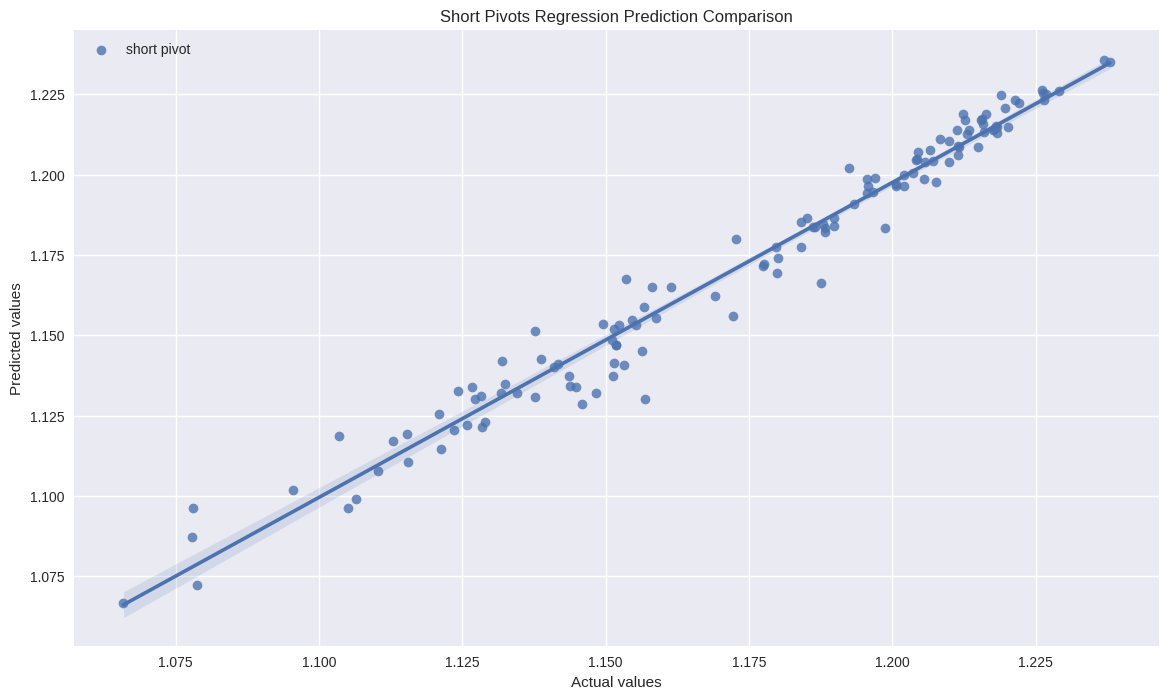

In [ ]:
# Plot of predicted vs Actual values for short Pivots using test model
sns.regplot(x=y_test_short_unscaled, y=prediction_short_unscaled, label='short pivot')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Short Pivots Regression Prediction Comparison')
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics
print('TEST PREDICTION:')
print(f'Short Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
print('R2-score Short Pivots:', r2_score(y_test_short_unscaled, prediction_short_unscaled)*100) # R2 score (coefficient of determination)
print('MSE Short Pivots:', mean_squared_error(y_test_short_unscaled, prediction_short_unscaled)) # MSE (Mean Squared Error)
print('RMSE Short Pivots:', mean_squared_error(y_test_short_unscaled, prediction_short_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE Short Pivots:', mean_absolute_percentage_error(y_test_short_unscaled, prediction_short_unscaled)*100) # MAPE (Mean Absolute Percentage Error)

TEST PREDICTION:
Short Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score Short Pivots: 96.9997792636209
MSE Short Pivots: 4.882273553345176e-05
RMSE Short Pivots: 0.006987326780210853
MAPE Short Pivots: 0.44578007589567614


In [ ]:
# Comparison Array
comparisonShort = y_test_short_unscaled
comparisonShort = np.append(comparisonShort, prediction_short_unscaled, axis=1)
print(comparisonShort[0],comparisonShort[1])

[1.22617    1.22638118] [1.22681   1.2250824]


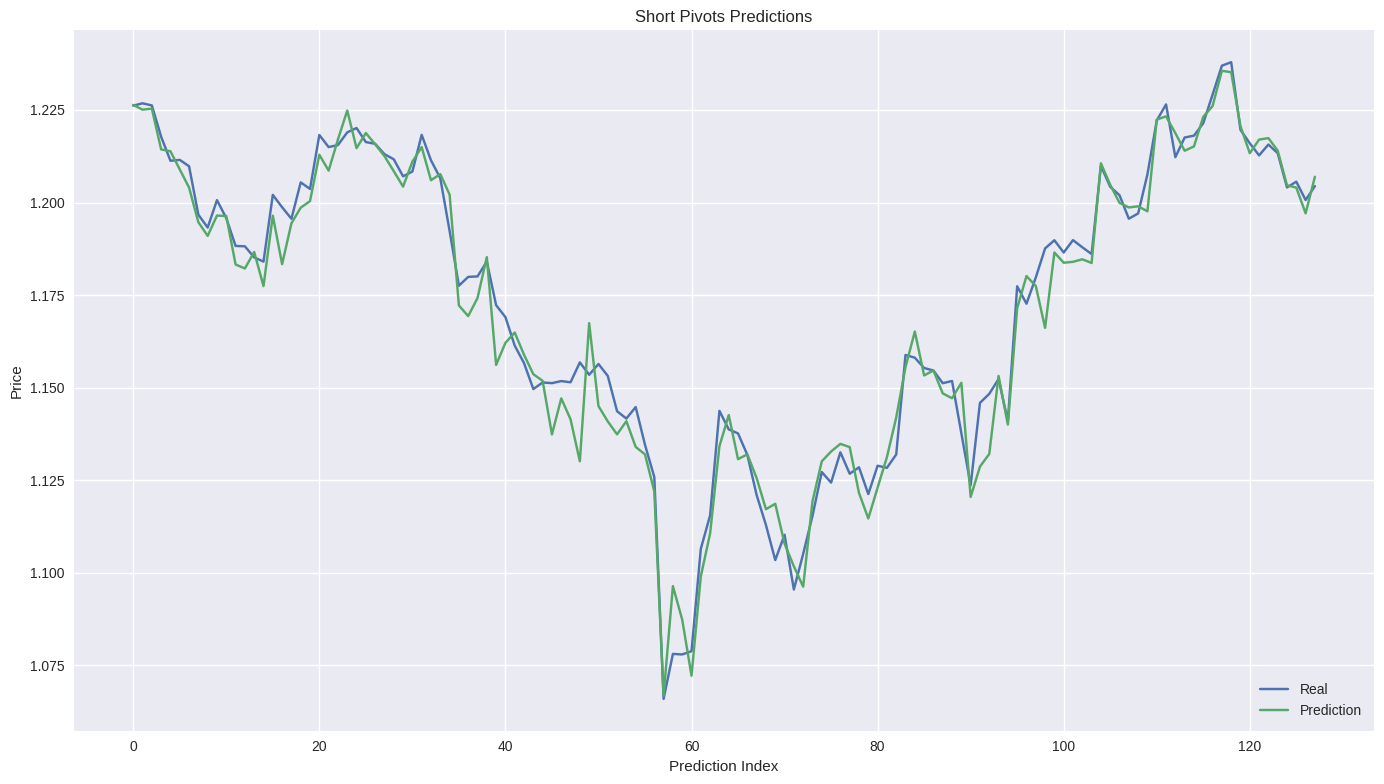

In [ ]:
# Plotting
# Short pivots prediction (E3)
plt.title("Short Pivots Predictions") 
plt.xlabel("Prediction Index") 
plt.ylabel("Price") 
plt.plot(y_test_short_unscaled)
plt.plot(prediction_short_unscaled)
plt.legend(['Real', 'Prediction'], loc='lower right')

plt.tight_layout()
plt.show()

### Long Pivot Model (GBPUSD)

#### Building, Training, and Predicting using Final Model

In [ ]:
# After finishing tuning, final training on whole train + val data. 
# Final tuning adjustments. (time_steps were declared at the data split part in the 'Part 2: data processing and feature selection')
# Epochs was used based on results from the training section's callbacks epoch stop
batch_size_final = 64
epochs_large_final = 13
units = 96

# Steps were based on previous test results
steps = 60

In [ ]:
# Build the long pivots model (have to rerun the train/val/test split due to difference in steps)
model_final = build_model_bilstm(steps, units)

# Combine val and train arrays to make the full training input and target
X_total_train = np.concatenate((X_train,X_val), axis=0)
y_total_train = np.concatenate((y_train,y_val), axis=0)

# Fit the final model
model_final.fit(x=X_total_train, y=y_total_train,
          epochs=epochs_large_final, batch_size=batch_size_final, verbose=1)

# Making prediction using unseen Test data
prediction = model_final.predict(X_test)

Epoch 1/13
19/19 [==============================] - 13s 342ms/step - loss: 0.0248 - mae: 0.1114
Epoch 2/13
19/19 [==============================] - 9s 454ms/step - loss: 0.0019 - mae: 0.0339
Epoch 3/13
19/19 [==============================] - 7s 354ms/step - loss: 9.7460e-04 - mae: 0.0235
Epoch 4/13
19/19 [==============================] - 8s 427ms/step - loss: 7.7942e-04 - mae: 0.0205
Epoch 5/13
19/19 [==============================] - 8s 411ms/step - loss: 7.6887e-04 - mae: 0.0204
Epoch 6/13
19/19 [==============================] - 7s 362ms/step - loss: 7.3031e-04 - mae: 0.0200
Epoch 7/13
19/19 [==============================] - 8s 447ms/step - loss: 7.6795e-04 - mae: 0.0205
Epoch 8/13
19/19 [==============================] - 7s 345ms/step - loss: 7.5560e-04 - mae: 0.0207
Epoch 9/13
19/19 [==============================] - 8s 450ms/step - loss: 7.4544e-04 - mae: 0.0205
Epoch 10/13
19/19 [==============================] - 7s 347ms/step - loss: 7.3954e-04 - mae: 0.0203
Epoch 11/13
19/1

#### Evaluating The Models Through Comparison and Plotting

In [ ]:
# De-normalize the train and test data and predictions
prediction_unscaled = scaler_target.inverse_transform(prediction)
y_test_unscaled = scaler_target.inverse_transform(y_test)

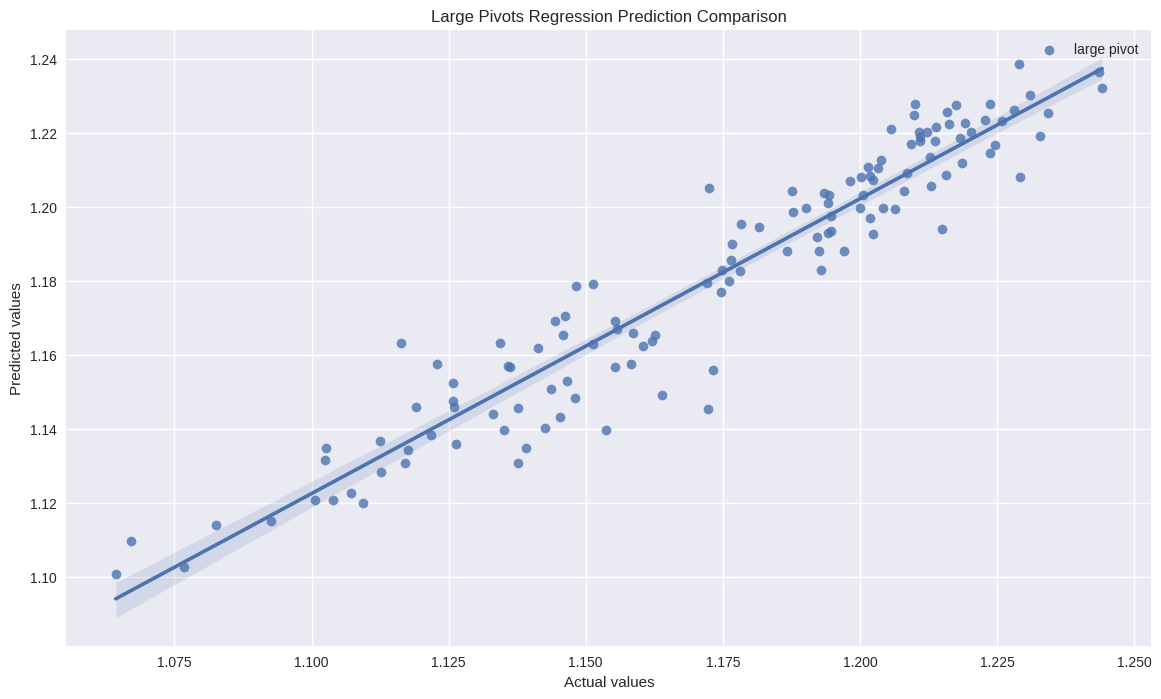

In [ ]:
# Plot of predicted vs Actual values for large Pivots using test model
sns.regplot(x=y_test_unscaled, y=prediction_unscaled, label='large pivot')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Large Pivots Regression Prediction Comparison')
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics
print('TEST PREDICTION:')
print(f'Large Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
print('R2-score Large Pivots:', r2_score(y_test_unscaled, prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE Large Pivots:', mean_squared_error(y_test_unscaled, prediction_unscaled)) # MSE (Mean Squared Error)
print('RMSE Large Pivots:', mean_squared_error(y_test_unscaled, prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE Large Pivots:', mean_absolute_percentage_error(y_test_unscaled, prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)

TEST PREDICTION:
Large Pivots: Steps 60, Batch size 64, Hidden Units 96
R2-score Large Pivots: 86.79374862558046
MSE Large Pivots: 0.00023527633953359105
RMSE Large Pivots: 0.015338720270400365
MAPE Large Pivots: 1.0320497037762935


In [ ]:
# Comparison Array
comparison = y_test_unscaled
comparison = np.append(comparison, prediction_unscaled, axis=1)

print(comparison[0],comparison[1])

[1.22893    1.23867285] [1.23275    1.21907759]


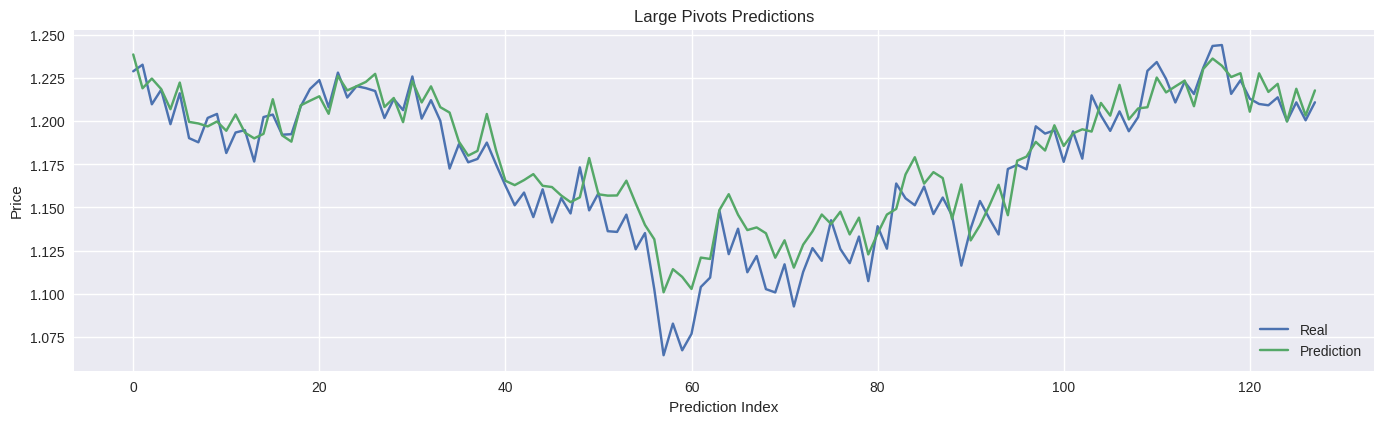

In [ ]:
# Plotting
# Big pivots prediction (E4)
plt.subplot(2, 1, 1)
plt.title("Large Pivots Predictions") 
plt.xlabel("Prediction Index") 
plt.ylabel("Price")  
plt.plot(y_test_unscaled)
plt.plot(prediction_unscaled)
plt.legend(['Real', 'Prediction'], loc='lower right')

plt.tight_layout()
plt.show()

# PART 5: EURUSD

## PART 5.1: Models, Experiments, Results, and Evaluation for EURUSD

### Models and Experiments

In [ ]:
# Hyperparameters to test (steps hyperparameter to be adjusted at the data processing level)
batch_size = 64
epochs = 100
units = 96

#### Declaring the models

In [ ]:
# Simple RNN Baseline
eurusd_baseline_short = build_model_baseline(steps, units)
eurusd_baseline = build_model_baseline(steps, units)

# GRU
eurusd_gru_short = build_model_gru(steps, units)
eurusd_gru = build_model_gru(steps, units)

# LSTM
eurusd_lstm_short = build_model_lstm(steps, units)
eurusd_lstm = build_model_lstm(steps, units)

# BiLSTM
eurusd_bilstm_short = build_model_bilstm(steps, units)
eurusd_bilstm = build_model_bilstm(steps, units)

#### Fitting the models

In [ ]:
# Define the EarlyStopping callback with validation loss monitoring
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Training (fitting) the models
# Simple RNN Baseline
history_eurusd_baseline_short = eurusd_baseline_short.fit(x=X_train, y=y_train_short, validation_data=(X_val, y_val_short), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)
history_eurusd_baseline = eurusd_baseline.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

# GRU
history_eurusd_gru_short = eurusd_gru_short.fit(x=X_train, y=y_train_short, validation_data=(X_val, y_val_short), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)
history_eurusd_gru = eurusd_gru.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

# LSTM
history_eurusd_lstm_short = eurusd_lstm_short.fit(x=X_train, y=y_train_short, validation_data=(X_val, y_val_short), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)
history_eurusd_lstm = eurusd_lstm.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

# BiLSTM
history_eurusd_bilstm_short = eurusd_bilstm_short.fit(x=X_train, y=y_train_short, validation_data=(X_val, y_val_short), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)
history_eurusd_bilstm = eurusd_bilstm.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[early_stopping], epochs=epochs, batch_size=batch_size, verbose=1)

#### Finding best epochs (for use in final model)

In [ ]:
# Best epochs
print('Baseline RNN:')
print('Short Pivot Best Epochs: ',np.argmin(history_eurusd_baseline_short.history['val_loss']) + 1)
print('Large Pivot Best Epochs: ',np.argmin(history_eurusd_baseline.history['val_loss']) + 1)
print()
print('GRU:')
print('Short Pivot Best Epochs: ',np.argmin(history_eurusd_gru_short.history['val_loss']) + 1)
print('Large Pivot Best Epochs: ',np.argmin(history_eurusd_gru.history['val_loss']) + 1)
print()
print('LSTM:')
print('Short Pivot Best Epochs: ',np.argmin(history_eurusd_lstm_short.history['val_loss']) + 1)
print('Large Pivot Best Epochs: ',np.argmin(history_eurusd_lstm.history['val_loss']) + 1)
print()
print('BILSTM:')
print('Short Pivot Best Epochs: ',np.argmin(history_eurusd_bilstm_short.history['val_loss']) + 1)
print('Large Pivot Best Epochs: ',np.argmin(history_eurusd_bilstm.history['val_loss']) + 1)

Baseline RNN:
Short Pivot Best Epochs:  30
Large Pivot Best Epochs:  19

GRU:
Short Pivot Best Epochs:  55
Large Pivot Best Epochs:  21

LSTM:
Short Pivot Best Epochs:  27
Large Pivot Best Epochs:  35

BILSTM:
Short Pivot Best Epochs:  39
Large Pivot Best Epochs:  19


### Models Prediction Results and Evaluation

In [ ]:
# Making prediction using unseen Test data
# Baseline RNN
baseline_prediction_short = eurusd_baseline_short.predict(X_test)
baseline_prediction = eurusd_baseline.predict(X_test)

# GRU
gru_prediction_short = eurusd_gru_short.predict(X_test)
gru_prediction = eurusd_gru.predict(X_test)

# LSTM
lstm_prediction_short = eurusd_lstm_short.predict(X_test)
lstm_prediction = eurusd_lstm.predict(X_test)

# BILSTM
bilstm_prediction_short = eurusd_bilstm_short.predict(X_test)
bilstm_prediction = eurusd_bilstm.predict(X_test)

4/4 [==============================] - 1s 62ms/step


In [ ]:
# De-normalize the train and test data and predictions

# Baseline RNN
baseline_prediction_short_unscaled = scaler_target_short.inverse_transform(baseline_prediction_short)
baseline_prediction_unscaled = scaler_target.inverse_transform(baseline_prediction)

# GRU
gru_prediction_short_unscaled = scaler_target_short.inverse_transform(gru_prediction_short)
gru_prediction_unscaled = scaler_target.inverse_transform(gru_prediction)

# LSTM
lstm_prediction_short_unscaled = scaler_target_short.inverse_transform(lstm_prediction_short)
lstm_prediction_unscaled = scaler_target.inverse_transform(lstm_prediction)

# BILSTM
bilstm_prediction_short_unscaled = scaler_target_short.inverse_transform(bilstm_prediction_short)
bilstm_prediction_unscaled = scaler_target.inverse_transform(bilstm_prediction)

# Common target data unscaled
y_test_short_unscaled = scaler_target_short.inverse_transform(y_test_short)
y_test_unscaled = scaler_target.inverse_transform(y_test)

In [ ]:
# Evaluation metrics function
def eval_metrics(name, y_test_unscaled, y_test_short_unscaled, prediction_unscaled, prediction_short_unscaled):
  print(name)
  print('TEST PREDICTION: ', name)
  print(f'Short Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
  print('R2-score:', r2_score(y_test_short_unscaled, prediction_short_unscaled)*100) # R2 score (coefficient of determination)
  print('MSE:', mean_squared_error(y_test_short_unscaled, prediction_short_unscaled)) # MSE (Mean Squared Error)
  print('RMSE:', mean_squared_error(y_test_short_unscaled, prediction_short_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
  print('MAPE:', mean_absolute_percentage_error(y_test_short_unscaled, prediction_short_unscaled)*100) # MAPE (Mean Absolute Percentage Error)
  print()
  print(f'Long Pivots: Steps {steps}, Batch size {batch_size}, Hidden Units {units}')
  print('R2-score:', r2_score(y_test_unscaled, prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
  print('MSE:', mean_squared_error(y_test_unscaled, prediction_unscaled)) # MSE (Mean Squared Error)
  print('RMSE:', mean_squared_error(y_test_unscaled, prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
  print('MAPE:', mean_absolute_percentage_error(y_test_unscaled, prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)
  print()
  

In [ ]:
# Evaluations
eval_metrics('Baseline RNN', y_test_unscaled, y_test_short_unscaled, baseline_prediction_unscaled, baseline_prediction_short_unscaled)
eval_metrics('GRU', y_test_unscaled, y_test_short_unscaled, gru_prediction_unscaled, gru_prediction_short_unscaled)
eval_metrics('LSTM', y_test_unscaled, y_test_short_unscaled, lstm_prediction_unscaled, lstm_prediction_short_unscaled)
eval_metrics('BILSTM', y_test_unscaled, y_test_short_unscaled, bilstm_prediction_unscaled, bilstm_prediction_short_unscaled)

Baseline RNN
TEST PREDICTION:  Baseline RNN
Short Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 28.186085665823345
MSE: 0.0004996672213114694
RMSE: 0.02235323737876618
MAPE: 1.7806399278304912

Long Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 56.48056624562597
MSE: 0.0003307644301435545
RMSE: 0.018186930201206427
MAPE: 1.4278146859309948

GRU
TEST PREDICTION:  GRU
Short Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 78.47374565191697
MSE: 0.00014977548285836524
RMSE: 0.012238279407595058
MAPE: 0.9342360020164444

Long Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 40.934563512267516
MSE: 0.0004489200284937429
RMSE: 0.021187732972022817
MAPE: 1.7314375880854955

LSTM
TEST PREDICTION:  LSTM
Short Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 53.913658893065296
MSE: 0.0003206597804174494
RMSE: 0.017906975747385413
MAPE: 1.4451677446413194

Long Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score: 11.420200593748287
MSE

## PART 5.2: Final Model (Train + Val Datasets Training) and Final Results (EURUSD)

### Short Pivot Model (EURUSD)

#### Building, Training, and Predicting using Final Model

In [ ]:
# After finishing tuning, final training on whole train + val data. 
# Final tuning adjustments. (time_steps were declared at the data split part in the 'Part 2: data processing and feature selection')
# Epochs was used based on results from the training section's callbacks epoch stop
batch_size_final = 64
epochs_short_final = 49
units = 96

# Steps were based on previous test results
steps = 60

In [ ]:
# Build the short pivots model 
model_short_final = build_model_lstm(steps, units)

# Combine val and train arrays to make the full training input and target
X_total_train = np.concatenate((X_train,X_val), axis=0)
y_total_train_short = np.concatenate((y_train_short,y_val_short), axis=0)#

# Fit the final model
model_short_final.fit(x=X_total_train, y=y_total_train_short,
          epochs=epochs_short_final, batch_size=batch_size_final, verbose=1)

# Making prediction using unseen Test data
prediction_short = model_short_final.predict(X_test)

Epoch 1/49
16/16 [==============================] - 6s 156ms/step - loss: 0.0604 - mae: 0.1771
Epoch 2/49
16/16 [==============================] - 3s 159ms/step - loss: 0.0034 - mae: 0.0471
Epoch 3/49
16/16 [==============================] - 3s 220ms/step - loss: 0.0012 - mae: 0.0260
Epoch 4/49
16/16 [==============================] - 3s 180ms/step - loss: 5.2729e-04 - mae: 0.0177
Epoch 5/49
16/16 [==============================] - 2s 152ms/step - loss: 4.3355e-04 - mae: 0.0158
Epoch 6/49
16/16 [==============================] - 2s 149ms/step - loss: 3.9170e-04 - mae: 0.0151
Epoch 7/49
16/16 [==============================] - 2s 155ms/step - loss: 3.7776e-04 - mae: 0.0149
Epoch 8/49
16/16 [==============================] - 4s 258ms/step - loss: 3.2477e-04 - mae: 0.0136
Epoch 9/49
16/16 [==============================] - 3s 157ms/step - loss: 2.9950e-04 - mae: 0.0130
Epoch 10/49
16/16 [==============================] - 2s 155ms/step - loss: 2.9125e-04 - mae: 0.0128
Epoch 11/49
16/16 [==

#### Evaluating The Models Through Comparison and Plotting

In [ ]:
# De-normalize the train and test data and predictions
prediction_short_unscaled = scaler_target_short.inverse_transform(prediction_short)
y_test_short_unscaled = scaler_target_short.inverse_transform(y_test_short)

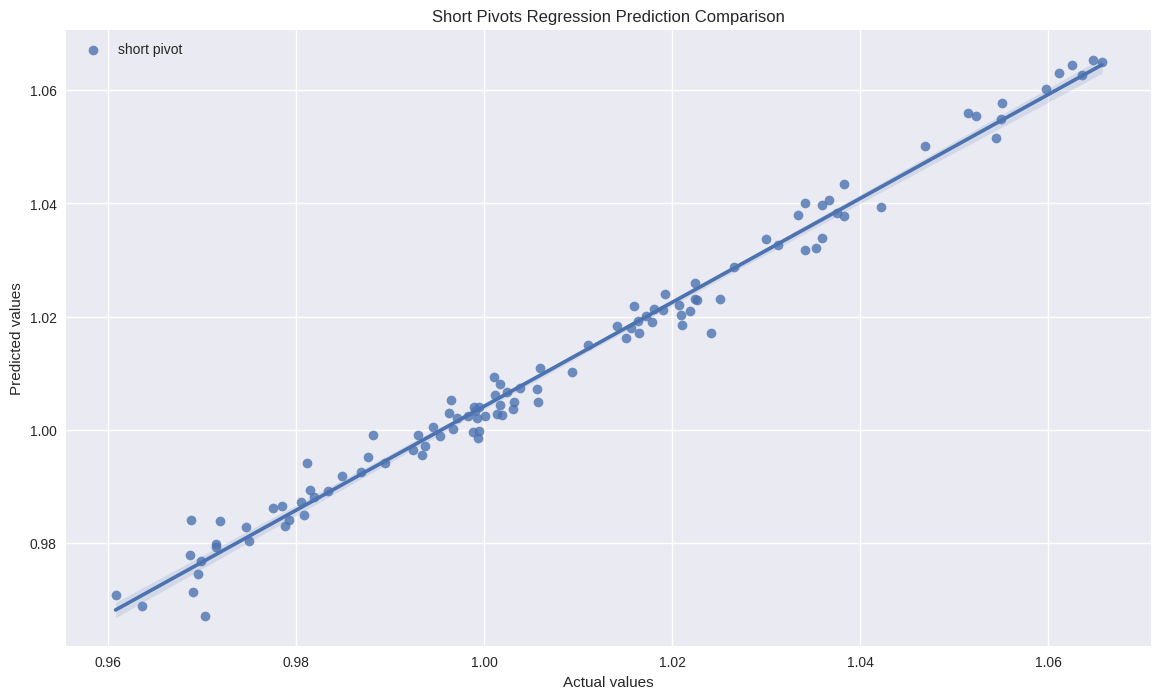

In [ ]:
# Plot of predicted vs Actual values for short Pivots using test model
sns.regplot(x=y_test_short_unscaled, y=prediction_short_unscaled, label='short pivot')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Short Pivots Regression Prediction Comparison')
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics
print('TEST PREDICTION:')
print(f'Short Pivots: Steps {steps}, Batch size {batch_size_final}, Hidden Units {units}')
print('R2-score Short Pivots:', r2_score(y_test_short_unscaled, prediction_short_unscaled)*100) # R2 score (coefficient of determination)
print('MSE Short Pivots:', mean_squared_error(y_test_short_unscaled, prediction_short_unscaled)) # MSE (Mean Squared Error)
print('RMSE Short Pivots:', mean_squared_error(y_test_short_unscaled, prediction_short_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE Short Pivots:', mean_absolute_percentage_error(y_test_short_unscaled, prediction_short_unscaled)*100) # MAPE (Mean Absolute Percentage Error)

TEST PREDICTION:
Short Pivots: Steps 60, Batch size 64, Hidden Units 96
R2-score Short Pivots: 96.30055306855503
MSE Short Pivots: 2.5740030824982328e-05
RMSE Short Pivots: 0.005073463395451112
MAPE Short Pivots: 0.41260536765370254


In [ ]:
# Comparison Array
comparisonShort = y_test_short_unscaled
comparisonShort = np.append(comparisonShort, prediction_short_unscaled, axis=1)
print(comparisonShort[0],comparisonShort[1])

[1.00239    1.00663614] [1.00172    1.00443554]


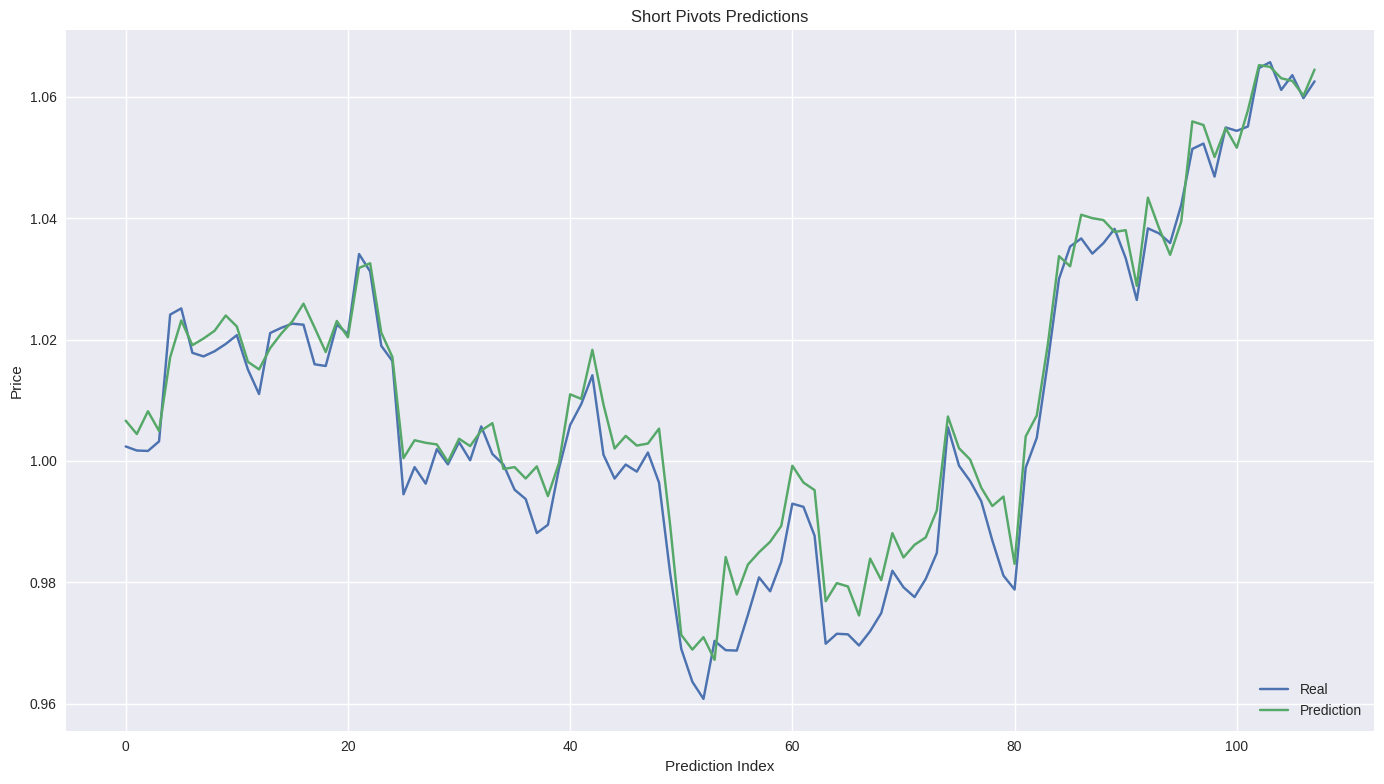

In [ ]:
# Plotting
# Short pivots prediction (E3)
plt.title("Short Pivots Predictions") 
plt.xlabel("Prediction Index") 
plt.ylabel("Price") 
plt.plot(y_test_short_unscaled)
plt.plot(prediction_short_unscaled)
plt.legend(['Real', 'Prediction'], loc='lower right')

plt.tight_layout()
plt.show()

### Long Pivot Model (EURUSD)

#### Building, Training, and Predicting using Final Model

In [ ]:
# After finishing tuning, final training on whole train + val data. 
# Final tuning adjustments. (time_steps were declared at the data split part in the 'Part 2: data processing and feature selection')
# Epochs was used based on results from the training section's callbacks epoch stop
batch_size_final = 64
epochs_large_final = 52
units = 96

# Steps were based on previous test results
steps = 40

In [ ]:
# Build the long pivots model (have to rerun the train/val/test split due to difference in steps)
model_final = build_model_gru(steps, units)

# Combine val and train arrays to make the full training input and target
X_total_train = np.concatenate((X_train,X_val), axis=0)
y_total_train = np.concatenate((y_train,y_val), axis=0)

# Fit the final model
model_final.fit(x=X_total_train, y=y_total_train,
          epochs=epochs_large_final, batch_size=batch_size_final, verbose=1)

# Making prediction using unseen Test data
prediction = model_final.predict(X_test)

Epoch 1/52
16/16 [==============================] - 11s 224ms/step - loss: 0.0633 - mae: 0.1673
Epoch 2/52
16/16 [==============================] - 4s 227ms/step - loss: 0.0049 - mae: 0.0543
Epoch 3/52
16/16 [==============================] - 4s 281ms/step - loss: 0.0030 - mae: 0.0410
Epoch 4/52
16/16 [==============================] - 4s 259ms/step - loss: 0.0024 - mae: 0.0359
Epoch 5/52
16/16 [==============================] - 4s 219ms/step - loss: 0.0022 - mae: 0.0335
Epoch 6/52
16/16 [==============================] - 3s 219ms/step - loss: 0.0024 - mae: 0.0359
Epoch 7/52
16/16 [==============================] - 5s 335ms/step - loss: 0.0021 - mae: 0.0332
Epoch 8/52
16/16 [==============================] - 4s 227ms/step - loss: 0.0021 - mae: 0.0336
Epoch 9/52
16/16 [==============================] - 4s 222ms/step - loss: 0.0020 - mae: 0.0321
Epoch 10/52
16/16 [==============================] - 5s 335ms/step - loss: 0.0019 - mae: 0.0316
Epoch 11/52
16/16 [=============================

#### Evaluating The Models Through Comparison and Plotting

In [ ]:
# De-normalize the train and test data and predictions
prediction_unscaled = scaler_target.inverse_transform(prediction)
y_test_unscaled = scaler_target.inverse_transform(y_test)

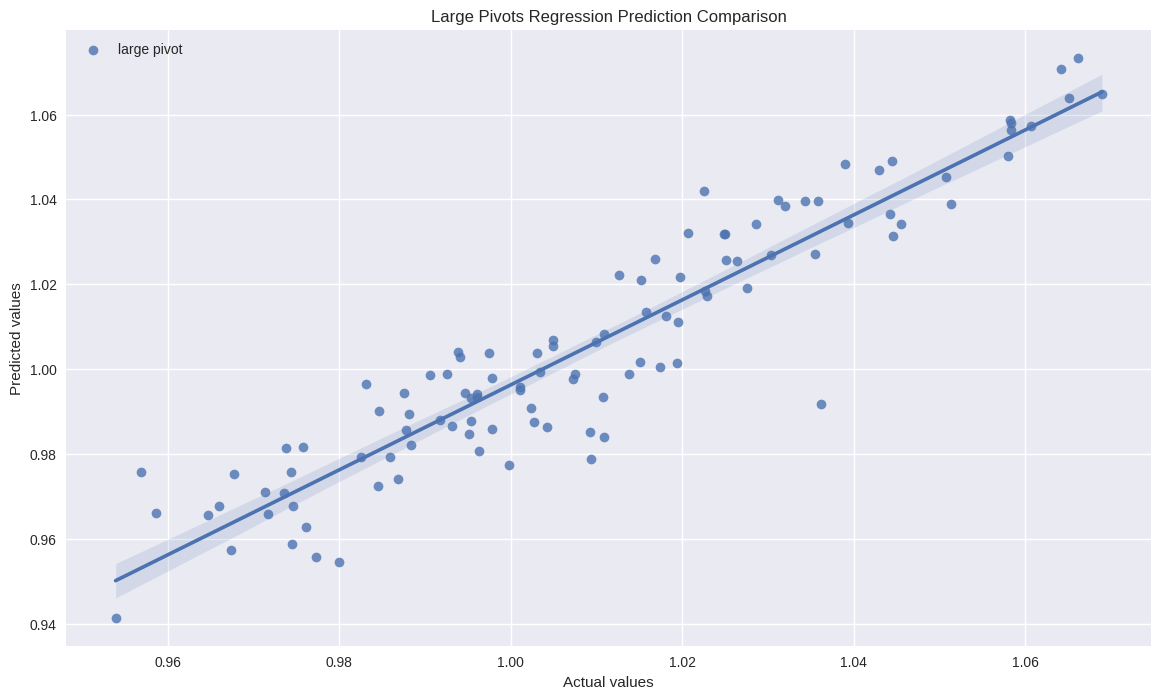

In [ ]:
# Plot of predicted vs Actual values for large Pivots using test model
sns.regplot(x=y_test_unscaled, y=prediction_unscaled, label='large pivot')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title('Large Pivots Regression Prediction Comparison')
plt.legend()
plt.show()

In [ ]:
# Evaluation metrics
print('TEST PREDICTION:')
print(f'Large Pivots: Steps {steps}, Batch size {batch_size_final}, Hidden Units {units}')
print('R2-score Large Pivots:', r2_score(y_test_unscaled, prediction_unscaled)*100) # R2 score (coefficient of determination) as a %
print('MSE Large Pivots:', mean_squared_error(y_test_unscaled, prediction_unscaled)) # MSE (Mean Squared Error)
print('RMSE Large Pivots:', mean_squared_error(y_test_unscaled, prediction_unscaled, squared=False)) # RMSE (Root Mean Squared Error)
print('MAPE Large Pivots:', mean_absolute_percentage_error(y_test_unscaled, prediction_unscaled)*100) # MAPE (Mean Absolute Percentage Error)

TEST PREDICTION:
Large Pivots: Steps 40, Batch size 64, Hidden Units 96
R2-score Large Pivots: 83.83679953114014
MSE Large Pivots: 0.0001228465384580315
RMSE Large Pivots: 0.011083615766437932
MAPE Large Pivots: 0.8381655490133298


In [ ]:
# Comparison Array
comparison = y_test_unscaled
comparison = np.append(comparison, prediction_unscaled, axis=1)

print(comparison[0],comparison[1])

[1.00102    0.99577606] [1.01072    0.99333405]


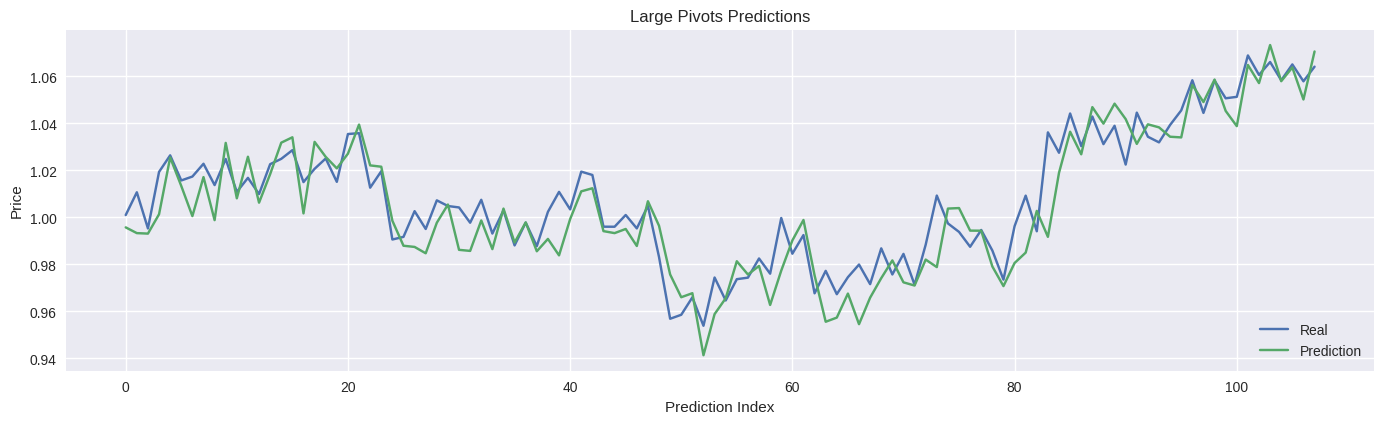

In [ ]:
# Plotting
# Big pivots prediction (E4)
plt.subplot(2, 1, 1)
plt.title("Large Pivots Predictions") 
plt.xlabel("Prediction Index") 
plt.ylabel("Price")  
plt.plot(y_test_unscaled)
plt.plot(prediction_unscaled)
plt.legend(['Real', 'Prediction'], loc='lower right')

plt.tight_layout()
plt.show()